In [1]:
import pandas as pd
from handlers import BehaviorDataHandler, PhotometryDataHandler
from helpers import (
    sync_behavior_data_to_photometry,
    get_gain_change_events,
    extract_data_of_interest,
)

# Instantiate data handlers
behavior_handler = BehaviorDataHandler()
photometry_handler = PhotometryDataHandler()

KeyError: 0

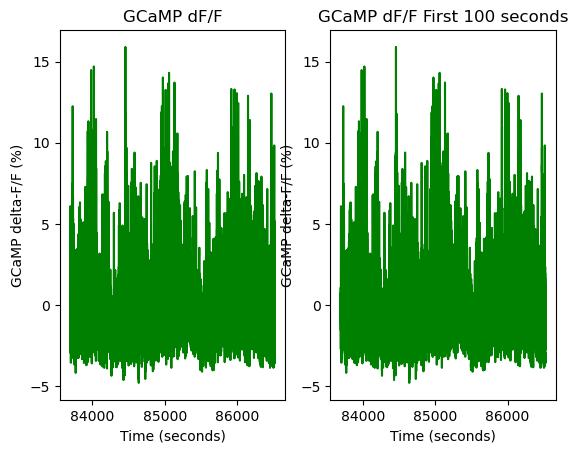

In [3]:
# Initialize an empty DataFrame to concatenate all the data
df_plot_all = []
window = (30, 80)

# for behavior_file, photometry_file in zip(behavior_handler.csv_files, photometry_handler.csv_files):

behavior_file = behavior_handler.csv_files[8]
photometry_file = photometry_handler.csv_files[8]

# Process the data
behavior_data = behavior_handler.process(behavior_file)
photometry_data = photometry_handler.process(photometry_file)

# Sync behavior data to photometry
synced_behavior_data = sync_behavior_data_to_photometry(behavior_data, photometry_data)

# Get gain change events
gain_change_events = get_gain_change_events(synced_behavior_data)

# Extract data of interest
df_plot = extract_data_of_interest(gain_change_events, photometry_data, window);

df_plot_all.append(df_plot)

In [8]:
synced_behavior_data = sync_behavior_data_to_photometry(behavior_data, photometry_data)
synced_behavior_data


Synced behavior to photometry for RL2, 1, 20220307



,Timestamp,WheelPosition,RunningSpeed,Reward,Gain,TrialNumber,mouse_id,training_group,session_date


In [13]:
# Concatenate the data
df_plot_all = pd.concat(df_plot_all, ignore_index=True)

# switch type of column
df_plot_all["gain_change"] = df_plot_all["gain_change"].astype('category')
df_plot_all["gain_change"].cat.reorder_categories(['++', '+', '0', '-', '--'])

0      0
1      0
2      0
3      0
4      0
      ..
990    -
991    -
992    -
993    -
994    -
Name: gain_change, Length: 995, dtype: category
Categories (5, object): ['++', '+', '0', '-', '--']

In [3]:
df_plot

,Timestamp,df_over_f,mouse_id,training_group,session_date,magnitude,gain_change,delta_position,phase_shift,gain_before,gain_after
0,-0.966624,-0.000651,1,RL1,20220114,0.0,0,10.464365,226.030279,0.3,0.3
1,-0.933280,-0.000038,1,RL1,20220114,0.0,0,10.464365,226.030279,0.3,0.3
2,-0.899968,0.001127,1,RL1,20220114,0.0,0,10.464365,226.030279,0.3,0.3
3,-0.866624,0.002376,1,RL1,20220114,0.0,0,10.464365,226.030279,0.3,0.3
4,-0.833280,0.003077,1,RL1,20220114,0.0,0,10.464365,226.030279,0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...
1993,2.566624,0.000008,1,RL1,20220114,-2.0,-,15.726319,339.688488,3.0,1.0
1994,2.599936,-0.000246,1,RL1,20220114,-2.0,-,15.726319,339.688488,3.0,1.0
1995,2.633280,-0.000465,1,RL1,20220114,-2.0,-,15.726319,339.688488,3.0,1.0
1996,2.666592,-0.000637,1,RL1,20220114,-2.0,-,15.726319,339.688488,3.0,1.0


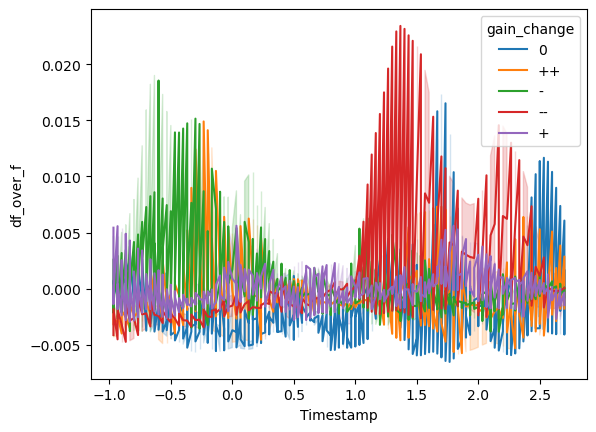

In [4]:
# Plot the data
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=df_plot, x="Timestamp", y="df_over_f", hue="gain_change")
plt.show()
